In [1]:
import numpy as np
import sempler
import sempler.generators
import src.utils as utils
import src.metrics as metrics

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import gridspec

import pickle
import os

import time

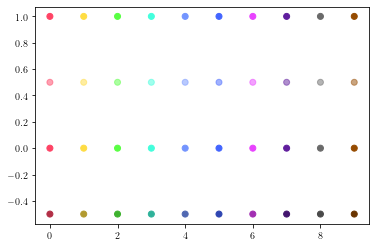

In [2]:
# Set tex formatting for plots
from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Computer Modern Roman']})
rc('text', usetex=True)
#plt.rcParams["font.family"] = "serif"
#plt.rcParams["font.serif"] = ["Computer Modern Roman"]

# Set legend size
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('medium')

# Colors
def to_rgb(H, b=1, a=1):
    RGBa = []
    for h in H:
        h = h.lstrip("#")
        RGBa.append(tuple(int(h[i:i+2], 16) / 256 * b for i in (0, 2, 4)) + (a,))
    return np.array(RGBa)

cmap = matplotlib.cm.get_cmap('tab20')
# Colorblind safe palettes
base = ['#d73027', '#f46d43', '#fdae61', '#fee090', '#020202', '#abd9e9', '#74add1', '#4575b4']
#base = ['#b2182b', '#d6604d', '#f4a582', '#fddbc7', '#d1e5f0', '#92c5de', '#4393c3', '#2166ac']
#base = ['#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#c7eae5', '#80cdc1', '#35978f', '#01665e']
# Rainbow palette
base = ["#ff4365", "#ffdd43", "#59ff43", "#43ffdd", "#7395ff", "#4365ff", "#e943ff", "#601e9e", "#6a6a6a", "#964b00"]#np.array([cmap(i) for i in range(2,20)])
plt.scatter(np.arange(len(base)), np.ones(len(base)), c = base)
#base = [base[i] for i in [0,1,3]]
colors = to_rgb(base)
colorsa = to_rgb(base, a=0.5)
colorsb = to_rgb(base, b=0.7)
plt.scatter(np.arange(len(colors)), np.zeros(len(colors)), c = colors)
plt.scatter(np.arange(len(colors)), np.ones(len(colors))*0.5, c = colorsa)
plt.scatter(np.arange(len(colors)), np.ones(len(colors))*-0.5, c = colorsb)

## Load results

In [3]:
directory_real = "sachs_experiments/real_dataset_dag:consensus/"
directory_gauss = "sachs_experiments/dataset_1658417439_runs:10_seed:42_tag:sachs_consensus_type:gauss_standardize:0_n:None/"
directory_drf = "sachs_experiments/dataset_1658417465_runs:10_seed:42_tag:sachs_consensus_type:drf_standardize:0_n:None/"

In [4]:
def load_results(directory, method, lambdas_idx=2):
    args, results = utils.read_pickle(directory + utils.compiled_results_filename(method))
    ground_truth, metrics = utils.read_pickle(directory + "metrics_%s.pickle" % method)
    return args, results, ground_truth, metrics, args[lambdas_idx]

**GnIES**

In [5]:
gnies_args, gnies_results, _, gnies_metrics_real, gnies_lambdas = load_results(directory_real, 'gnies')
gnies_args, gnies_results, _, gnies_metrics_gauss, gnies_lambdas = load_results(directory_gauss, 'gnies')
gnies_args, gnies_results, _, gnies_metrics_drf, gnies_lambdas = load_results(directory_drf, 'gnies')

gnies_x_real = np.nanmean(gnies_metrics_real[metrics.type_1_structc], axis=(0,3))
gnies_y_real = np.nanmean(gnies_metrics_real[metrics.type_2_structc], axis=(0,3))

gnies_x_gauss = np.nanmean(gnies_metrics_gauss[metrics.type_1_structc], axis=(0,3))
gnies_y_gauss = np.nanmean(gnies_metrics_gauss[metrics.type_2_structc], axis=(0,3))

gnies_x_drf = np.nanmean(gnies_metrics_drf[metrics.type_1_structc], axis=(0,3))
gnies_y_drf = np.nanmean(gnies_metrics_drf[metrics.type_2_structc], axis=(0,3))

(gnies_metrics_real[metrics.success_metric].mean()
 ,gnies_metrics_gauss[metrics.success_metric].mean()
 ,gnies_metrics_drf[metrics.success_metric].mean())

(1.0, 1.0, 1.0)

**UT-IGSP**

In [6]:
ut_igsp_args, ut_igsp_results, _, ut_igsp_metrics_real, ut_igsp_alphas_real = load_results(directory_real, 'ut_igsp',lambdas_idx=1)
ut_igsp_args, ut_igsp_results, _, ut_igsp_metrics_gauss, ut_igsp_alphas_gauss = load_results(directory_gauss, 'ut_igsp',lambdas_idx=1)
ut_igsp_args, ut_igsp_results, _, ut_igsp_metrics_drf, ut_igsp_alphas_drf = load_results(directory_drf, 'ut_igsp',lambdas_idx=1)

ut_igsp_x_real = np.nanmean(ut_igsp_metrics_real[metrics.type_1_structc], axis=(0,4))[:,0]
ut_igsp_y_real = np.nanmean(ut_igsp_metrics_real[metrics.type_2_structc], axis=(0,4))[:,0]

ut_igsp_x_gauss = np.nanmean(ut_igsp_metrics_gauss[metrics.type_1_structc], axis=(0,4))[:,0]
ut_igsp_y_gauss = np.nanmean(ut_igsp_metrics_gauss[metrics.type_2_structc], axis=(0,4))[:,0]

ut_igsp_x_drf = np.nanmean(ut_igsp_metrics_drf[metrics.type_1_structc], axis=(0,4))[:,0]
ut_igsp_y_drf = np.nanmean(ut_igsp_metrics_drf[metrics.type_2_structc], axis=(0,4))[:,0]

(ut_igsp_metrics_real[metrics.success_metric].mean()
 ,ut_igsp_metrics_gauss[metrics.success_metric].mean()
 ,ut_igsp_metrics_drf[metrics.success_metric].mean())

(1.0, 1.0, 1.0)

**GES**

In [7]:
ges_args, ges_results, _, ges_metrics_real, ges_lambdas = load_results(directory_real, 'ges')
ges_args, ges_results, _, ges_metrics_gauss, ges_lambdas = load_results(directory_gauss, 'ges')
ges_args, ges_results, _, ges_metrics_drf, ges_lambdas = load_results(directory_drf, 'ges')

ges_x_real = np.nanmean(ges_metrics_real[metrics.type_1_structc], axis=(0,3))
ges_y_real = np.nanmean(ges_metrics_real[metrics.type_2_structc], axis=(0,3))

ges_x_gauss = np.nanmean(ges_metrics_gauss[metrics.type_1_structc], axis=(0,3))
ges_y_gauss = np.nanmean(ges_metrics_gauss[metrics.type_2_structc], axis=(0,3))

ges_x_drf = np.nanmean(ges_metrics_drf[metrics.type_1_structc], axis=(0,3))
ges_y_drf = np.nanmean(ges_metrics_drf[metrics.type_2_structc], axis=(0,3))

(ges_metrics_real[metrics.success_metric].mean()
 ,ges_metrics_gauss[metrics.success_metric].mean()
 ,ges_metrics_drf[metrics.success_metric].mean())

(1.0, 1.0, 1.0)

In [8]:
ges_x_real

array([[0.89795918],
       [0.80555556],
       [0.81818182],
       [0.81818182],
       [0.84375   ]])

## Figures

### Figure 1: Class recovery trajectories

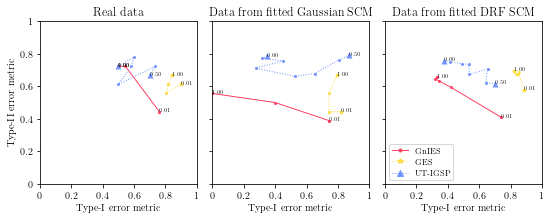

In [9]:
text = True
textsize = 5
lineopts = {'linewidth': 1}
ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
marker = {'gnies': '.',
          'gnies_rank': '.',
          'ges': '*',
          'ut_igsp': '^',
          'ut_igsp+': '^',
          'jci_pc': 's',           
}
style = {'gnies': '-',
         'gnies_rank': ':',
         'ges': ':',
         'ut_igsp': ':',
         'ut_igsp+': '--',
         'jci_pc': ':',
           
}
color = {'gnies': colors[0],
         'gnies_rank': colorsa[0],
         'ges': colors[1],
         'ut_igsp': colors[4],
         'ut_igsp+': colors[5],
         'jci_pc': colors[2],
         
}

print_names = {'gnies': 'GnIES',
               #'gnies_rank': 'GnIES-rank',
               'ges': 'GES',
               'ut_igsp': 'UT-IGSP',
               #'ut_igsp+': 'UT-IGSP+',
               #'jci_pc': 'JCI-PC',         
}

def plot_metric(ax, values_x, values_y, lambdas, method, points, text):
    ax.plot(values_x, values_y, color=color[method], linestyle=style[method], **lineopts)    
    for j,l in enumerate(lambdas):
        ax.scatter(values_x[j], values_y[j], color=color[method], marker='.', linewidth=0)        
        if text and (j==0 or j==points[-1]):
            ax.scatter(values_x[j], values_y[j], color=color[method], marker=marker[method], linewidth=0)
            ax.text(values_x[j], values_y[j], "$%0.2f$" % l, fontsize=textsize)

def set_ax(ax, yticks=True):
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel('Type-I error metric')    
    ax.set_ylabel('Type-II error metric') if yticks else None
    ax.set_yticks(ticks)
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks)
    ax.set_yticklabels(ticks) if yticks else ax.set_yticklabels([])
            
gs = gridspec.GridSpec(1, 3, wspace=0.10, hspace=0.2)
plt.figure(figsize=(9,3))
ax = plt.gca()

###########################
# PLOT REAL DATA
plt.subplot(gs[0])
ax = plt.gca()    
# Plot GnIES
plot_metric(ax, gnies_x_real, gnies_y_real, gnies_lambdas, 'gnies', [0,2,len(gnies_lambdas)-1], True)      
# Plot UT-IGSP
plot_metric(ax, ut_igsp_x_real, ut_igsp_y_real, ut_igsp_alphas_real, 'ut_igsp', [0,len(ut_igsp_alphas_real)-1], True)
# Plot GES
plot_metric(ax, ges_x_real, ges_y_real, ges_lambdas, 'ges', [0,2,len(ges_lambdas)-1], True)    
set_ax(ax, yticks=True)
ax.set_title("Real data")

###########################
# PLOT GAUSSIAN DATA
plt.subplot(gs[1])
ax = plt.gca()    
# Plot GnIES
plot_metric(ax, gnies_x_gauss, gnies_y_gauss, gnies_lambdas, 'gnies', [0,2,len(gnies_lambdas)-1], True)      
# Plot UT-IGSP
plot_metric(ax, ut_igsp_x_gauss, ut_igsp_y_gauss, ut_igsp_alphas_gauss, 'ut_igsp', [0,len(ut_igsp_alphas_gauss)-1], True)
# Plot GES
plot_metric(ax, ges_x_gauss, ges_y_gauss, ges_lambdas, 'ges', [0,2,len(ges_lambdas)-1], True)    
set_ax(ax, yticks=False)
ax.set_title("Data from fitted Gaussian SCM")

###########################
# PLOT DRF DATA
plt.subplot(gs[2])
ax = plt.gca()    
# Plot GnIES
plot_metric(ax, gnies_x_drf, gnies_y_drf, gnies_lambdas, 'gnies', [0,2,len(gnies_lambdas)-1], True)      
# Plot UT-IGSP
plot_metric(ax, ut_igsp_x_drf, ut_igsp_y_drf, ut_igsp_alphas_drf, 'ut_igsp', [0,len(ut_igsp_alphas_drf)-1], True)
# Plot GES
plot_metric(ax, ges_x_drf, ges_y_drf, ges_lambdas, 'ges', [0,2,len(ges_lambdas)-1], True)    
set_ax(ax, yticks=False)
ax.set_title("Data from fitted DRF SCM")

# Build legend
method_entries = [Line2D([0], [0],
                         linewidth=1,
                         linestyle=style[method],
                         marker=marker[method],
                         color=color[method]) for method in print_names.keys()]
method_str = list(print_names.values())
ax.legend(method_entries, #+ sample_size_entries
          method_str, # + sample_size_str
          prop={'size':8},
          loc='lower left',
        ncol=1)


plt.savefig('figures/figure_sachs.pdf', bbox_inches='tight')

In [10]:
ut_igsp_alphas_real

[0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]